## Initialize the Environment

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

torch.manual_seed(111)

## Prepare the Training Data

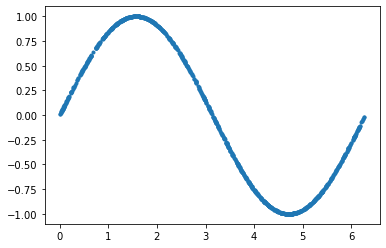

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

plt.plot(train_data[:, 0], train_data[:, 1], ".")

## Data Loader

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

## Discriminator

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 1),
        nn.Sigmoid(),
    )

  def forward(self, x):
    output = self.model(x)
    return output

discriminator = Discriminator()

## Generator

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 16),
        nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 2),
    )
  
  def forward(self, x):
    output = self.model(x)
    return output

generator = Generator()

## Train the Models

In [ ]:
lr = 0.001
num_epochs = 100
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
  for n, (real_samples, _) in enumerate(train_loader):

    # Data for training the discriminator
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, 2))

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    loss_generator.backward()
    optimizer_generator.step()

    # Show loss
    if epoch % 10 == 0 and n == batch_size - 1:
      print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
      print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.658380389213562
Epoch: 0 Loss G.: 0.9853957295417786
Epoch: 10 Loss D.: 0.6467640995979309
Epoch: 10 Loss G.: 0.8555415272712708
Epoch: 20 Loss D.: 0.6930250525474548
Epoch: 20 Loss G.: 1.1613558530807495
Epoch: 30 Loss D.: 0.5763177871704102
Epoch: 30 Loss G.: 0.9475609660148621
Epoch: 40 Loss D.: 0.6838077902793884
Epoch: 40 Loss G.: 0.7834959626197815
Epoch: 50 Loss D.: 0.6599805355072021
Epoch: 50 Loss G.: 0.7477537393569946
Epoch: 60 Loss D.: 0.6949367523193359
Epoch: 60 Loss G.: 0.749413013458252
Epoch: 70 Loss D.: 0.7331236600875854
Epoch: 70 Loss G.: 0.7457100749015808
Epoch: 80 Loss D.: 0.65522301197052
Epoch: 80 Loss G.: 0.6254198551177979
Epoch: 90 Loss D.: 0.666719377040863
Epoch: 90 Loss G.: 0.8664772510528564


## Evaluate the Model

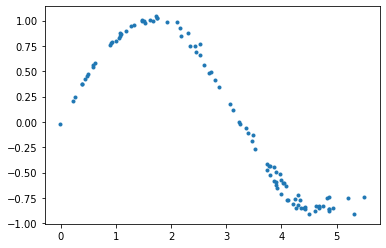

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
for epoch in range(num_epochs):
  for n, (real_samples, _) in enumerate(train_loader):

    # Data for training the discriminator
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, 2))

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    loss_generator.backward()
    optimizer_generator.step()

    # Show loss
    if epoch % 10 == 0 and n == batch_size - 1:
      print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
      print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.6594274044036865
Epoch: 0 Loss G.: 0.6742120981216431
Epoch: 10 Loss D.: 0.7810600996017456
Epoch: 10 Loss G.: 0.5896744132041931
Epoch: 20 Loss D.: 0.7147291898727417
Epoch: 20 Loss G.: 0.6801104545593262
Epoch: 30 Loss D.: 0.666420578956604
Epoch: 30 Loss G.: 0.7128800749778748
Epoch: 40 Loss D.: 0.7029258608818054
Epoch: 40 Loss G.: 0.738673210144043
Epoch: 50 Loss D.: 0.7037453651428223
Epoch: 50 Loss G.: 0.8513957262039185
Epoch: 60 Loss D.: 0.6612251400947571
Epoch: 60 Loss G.: 0.7528995275497437
Epoch: 70 Loss D.: 0.70008385181427
Epoch: 70 Loss G.: 0.7822933197021484
Epoch: 80 Loss D.: 0.6291502714157104
Epoch: 80 Loss G.: 0.8528103828430176
Epoch: 90 Loss D.: 0.6520348787307739
Epoch: 90 Loss G.: 0.7327625751495361


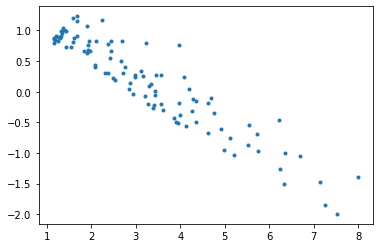

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")